In [3]:
%matplotlib notebook
import pickle
import sys
import plot_util
import pprint
import json
import os
import pandas as pd
from pathlib import Path
import util
from importlib import reload

pp = pprint.PrettyPrinter(indent=4)
myprint = pp.pprint




Saving the plot in  ../saves/liwc_dist/liwc_dist_posemo_negemo_sent_level_amz


<IPython.core.display.Javascript object>


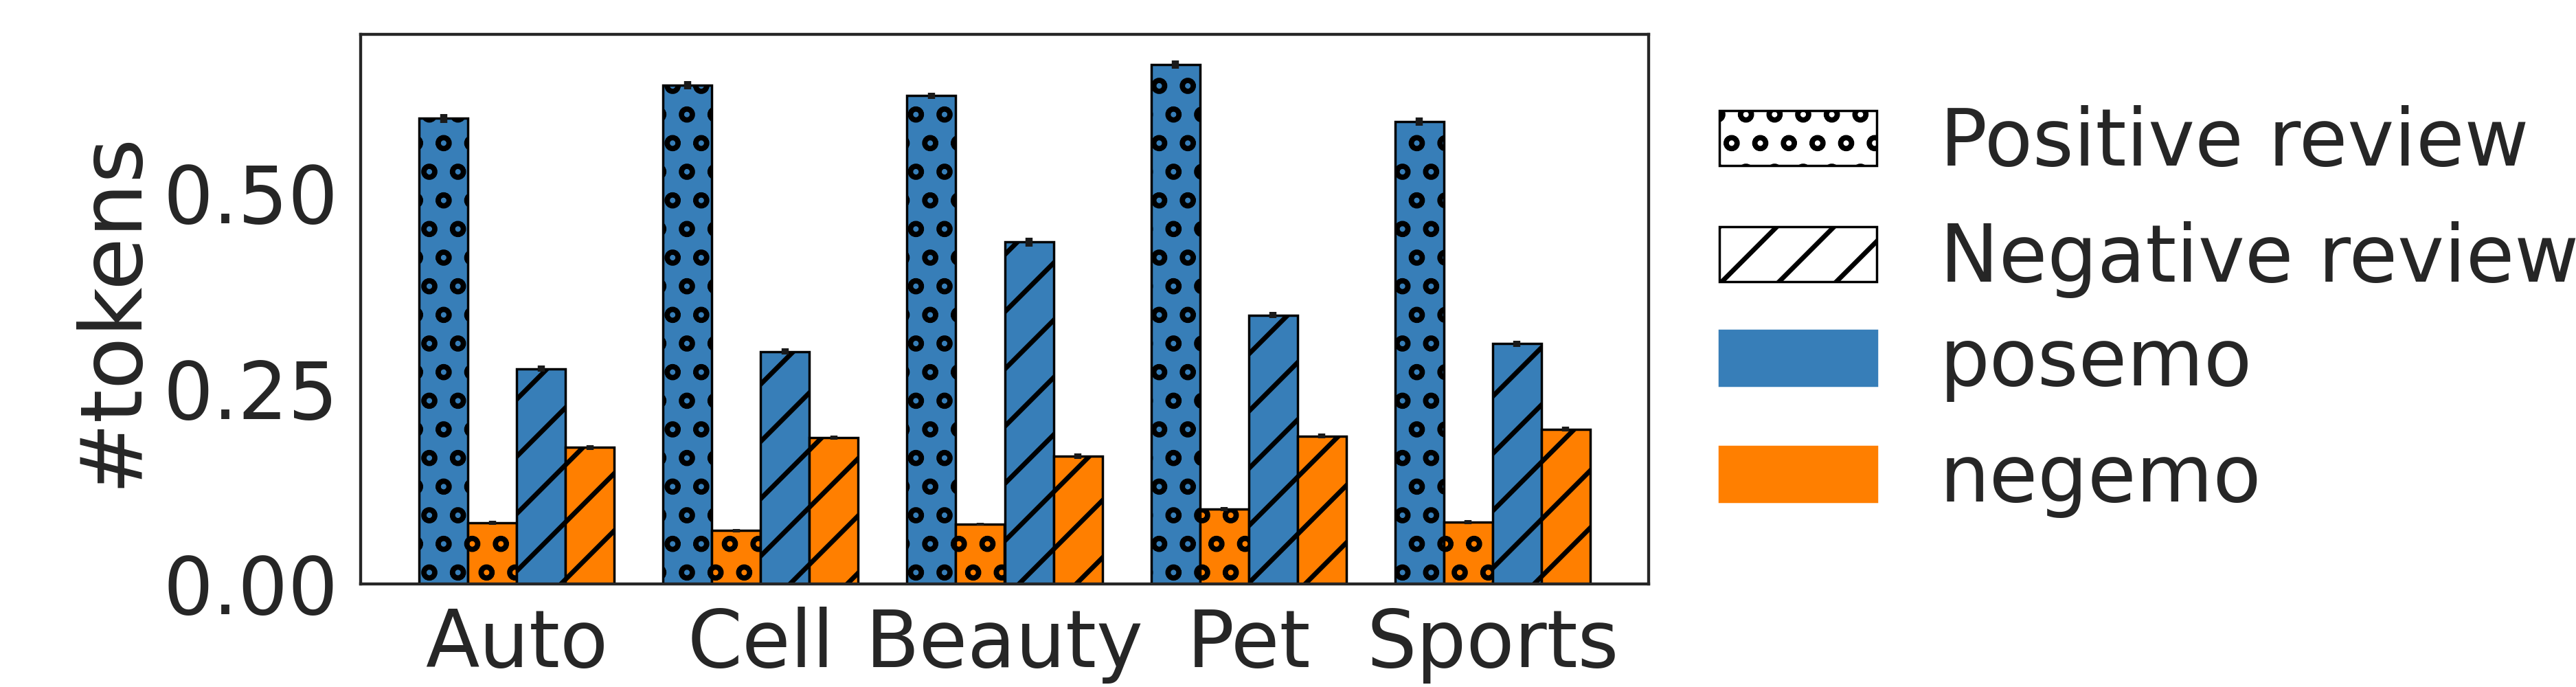

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.





Saving the plot in  ../saves/liwc_dist/liwc_dist_posemo_negemo_sent_level_non_amz


<IPython.core.display.Javascript object>


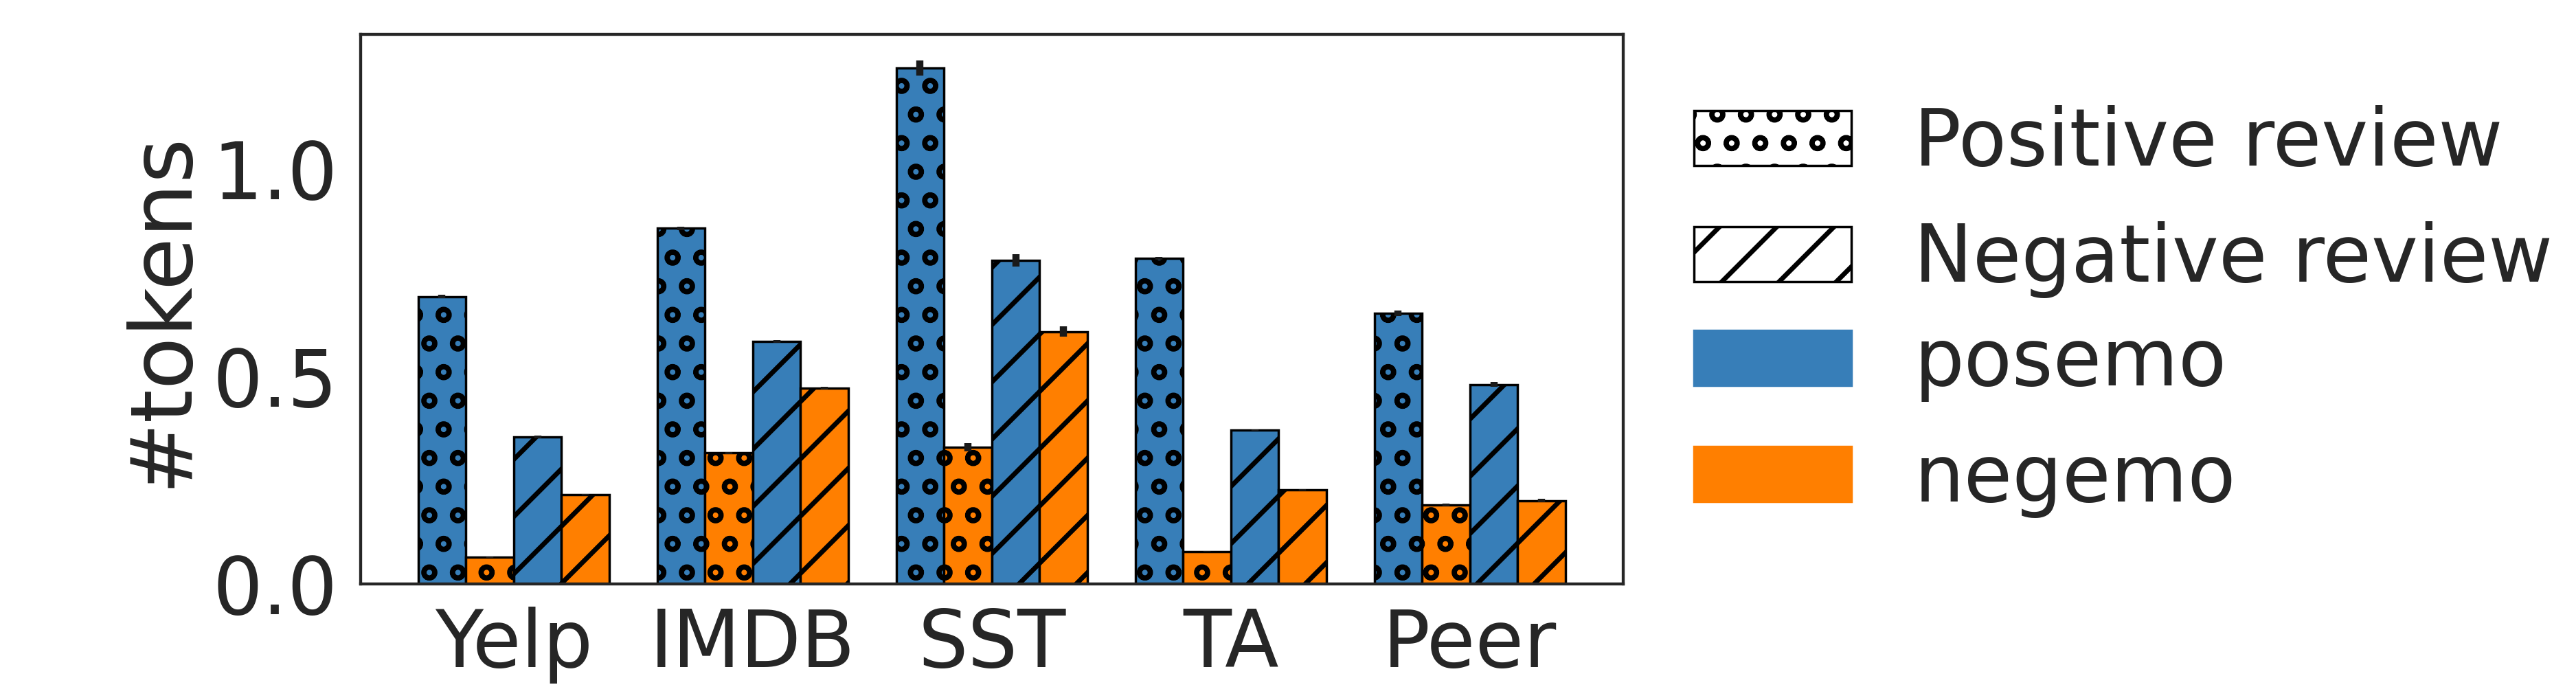




Saving the plot in  ../saves/liwc_dist/liwc_dist_anger_sad_sent_level_amz


<IPython.core.display.Javascript object>


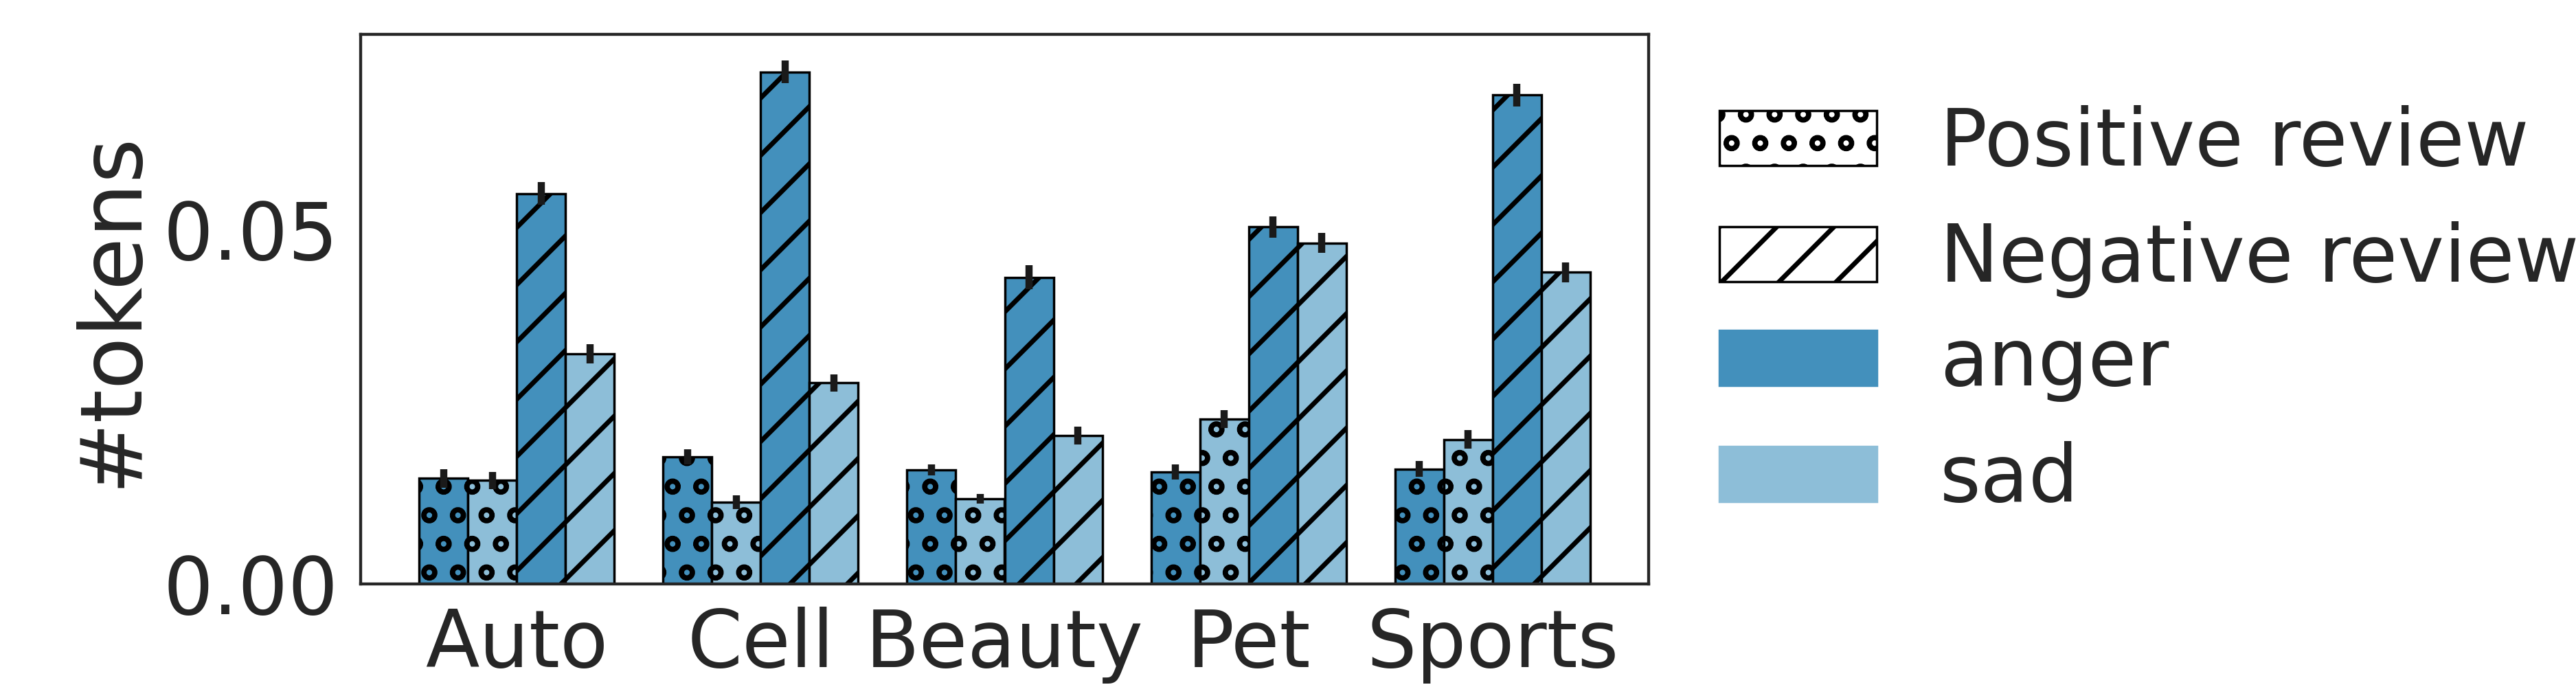




Saving the plot in  ../saves/liwc_dist/liwc_dist_anger_sad_sent_level_non_amz


<IPython.core.display.Javascript object>


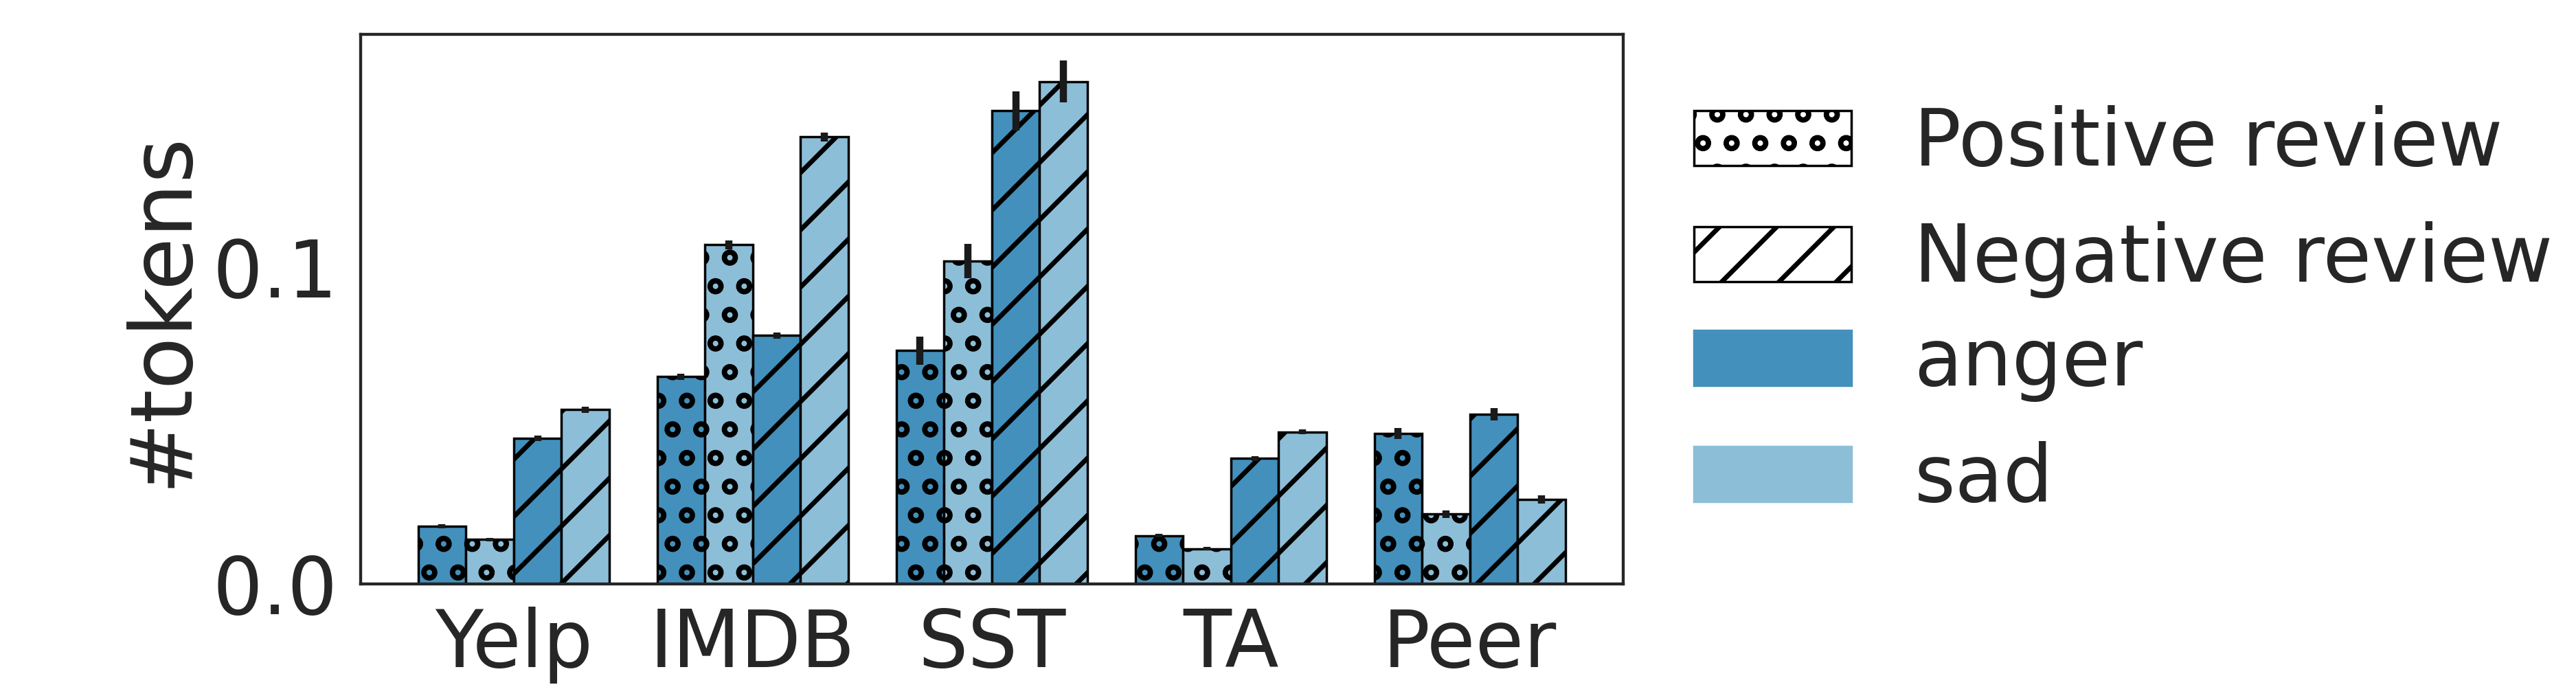




Saving the plot in  ../saves/liwc_dist/liwc_dist_posemo_negemo_review_level_amz


<IPython.core.display.Javascript object>


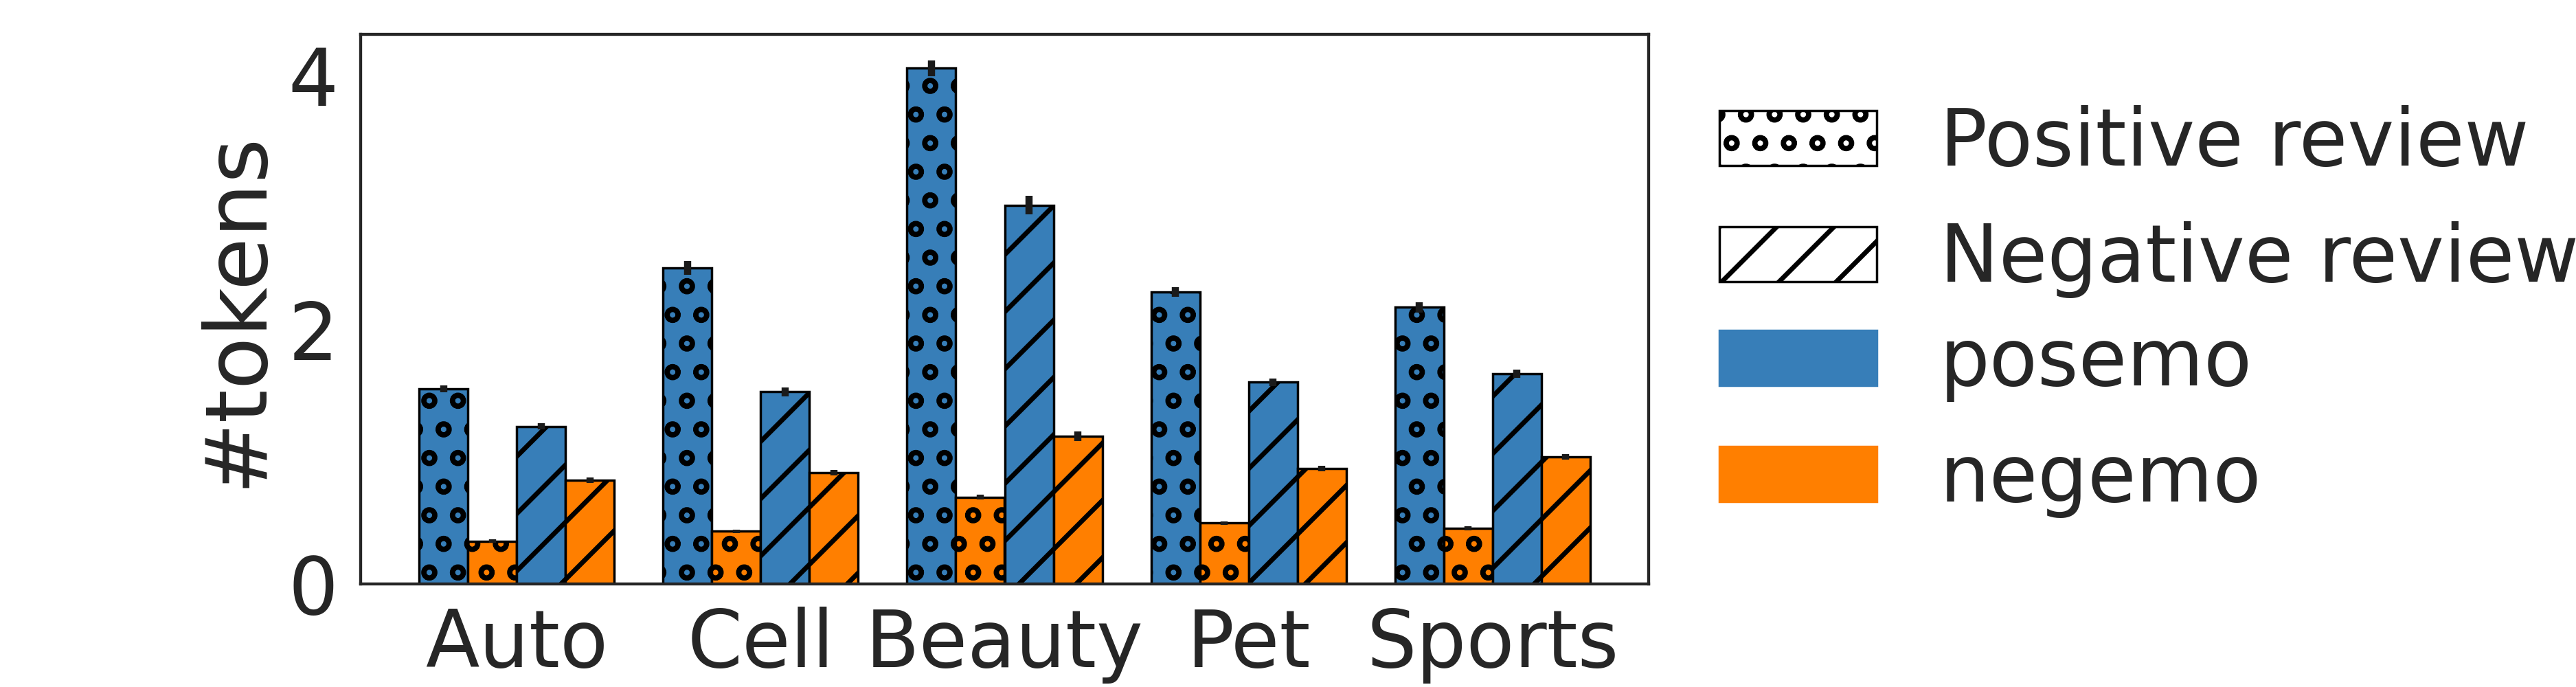




Saving the plot in  ../saves/liwc_dist/liwc_dist_posemo_negemo_review_level_non_amz


<IPython.core.display.Javascript object>


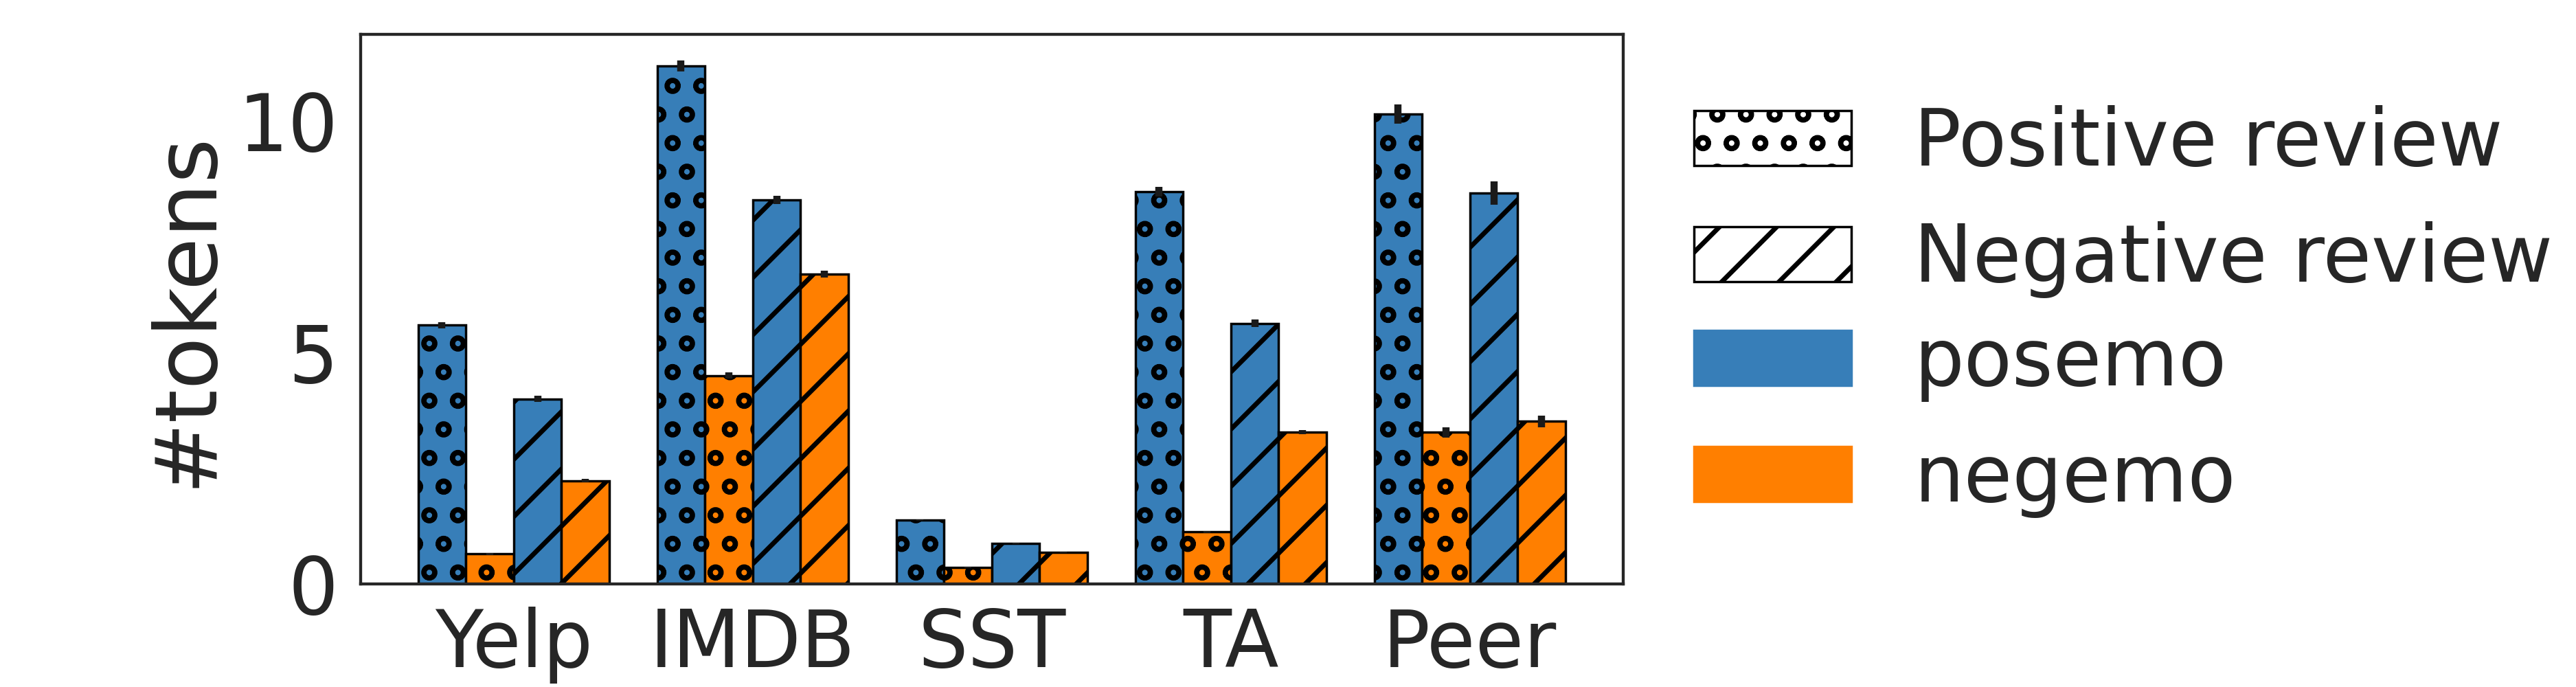




Saving the plot in  ../saves/liwc_dist/liwc_dist_anger_sad_review_level_amz


<IPython.core.display.Javascript object>


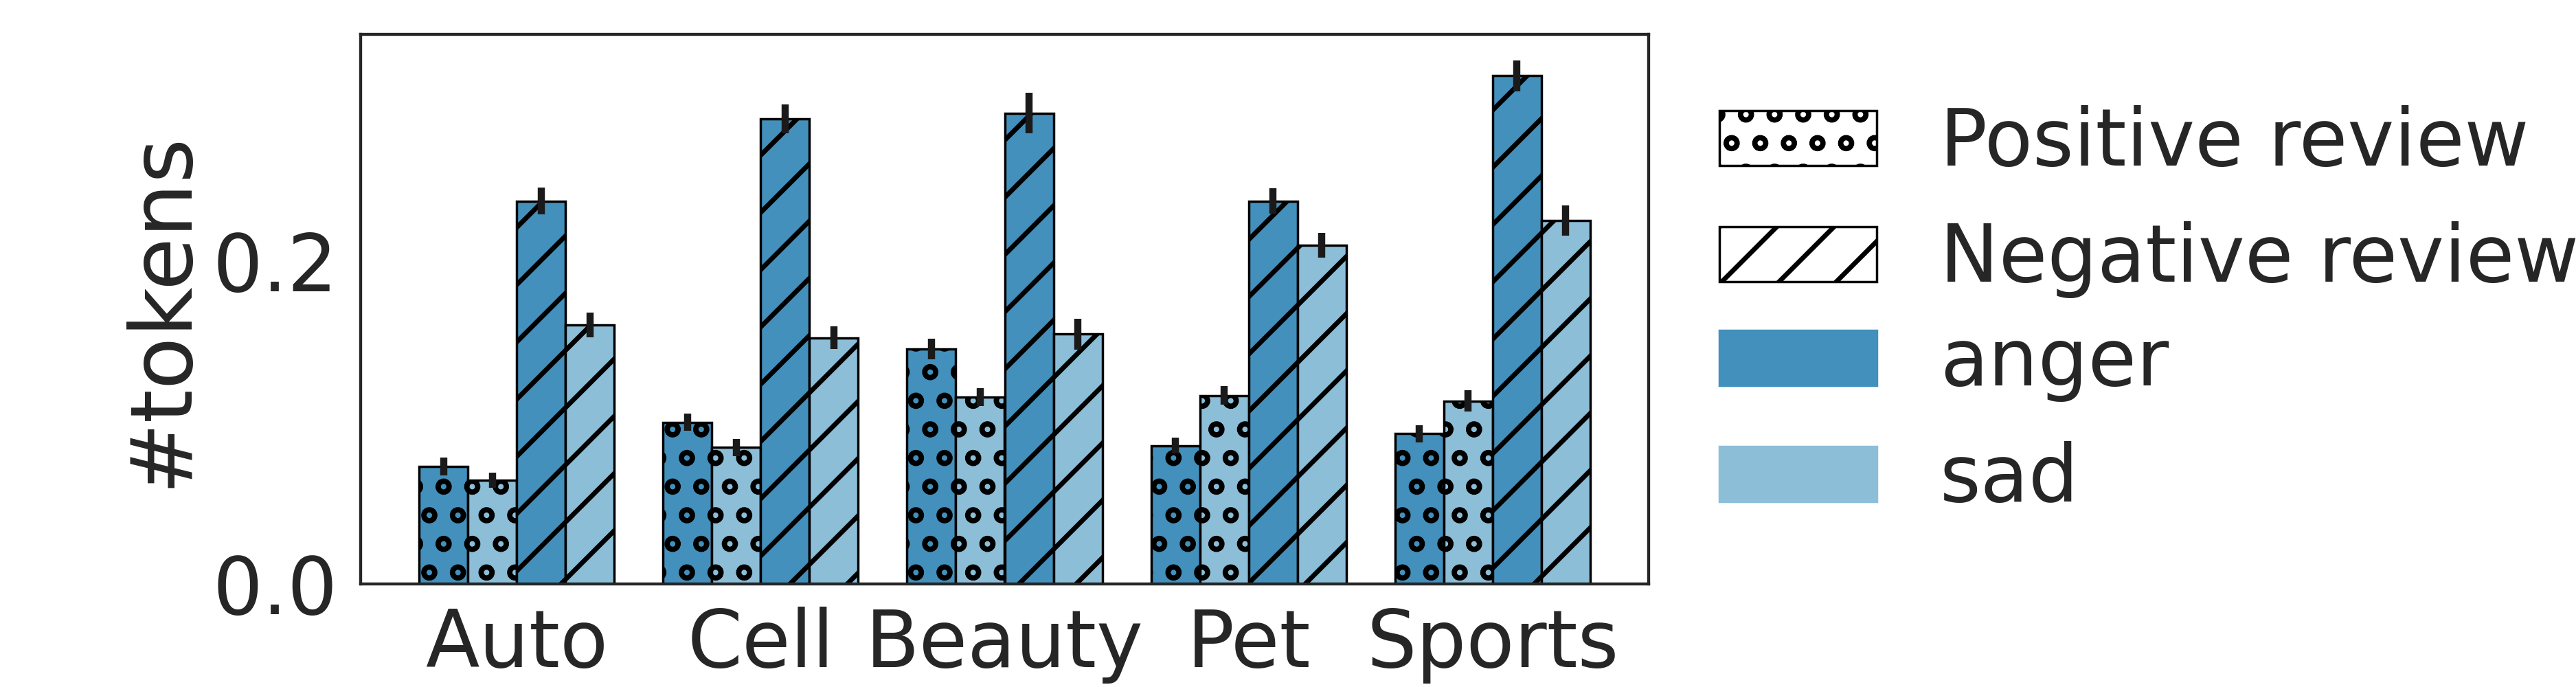




Saving the plot in  ../saves/liwc_dist/liwc_dist_anger_sad_review_level_non_amz


<IPython.core.display.Javascript object>


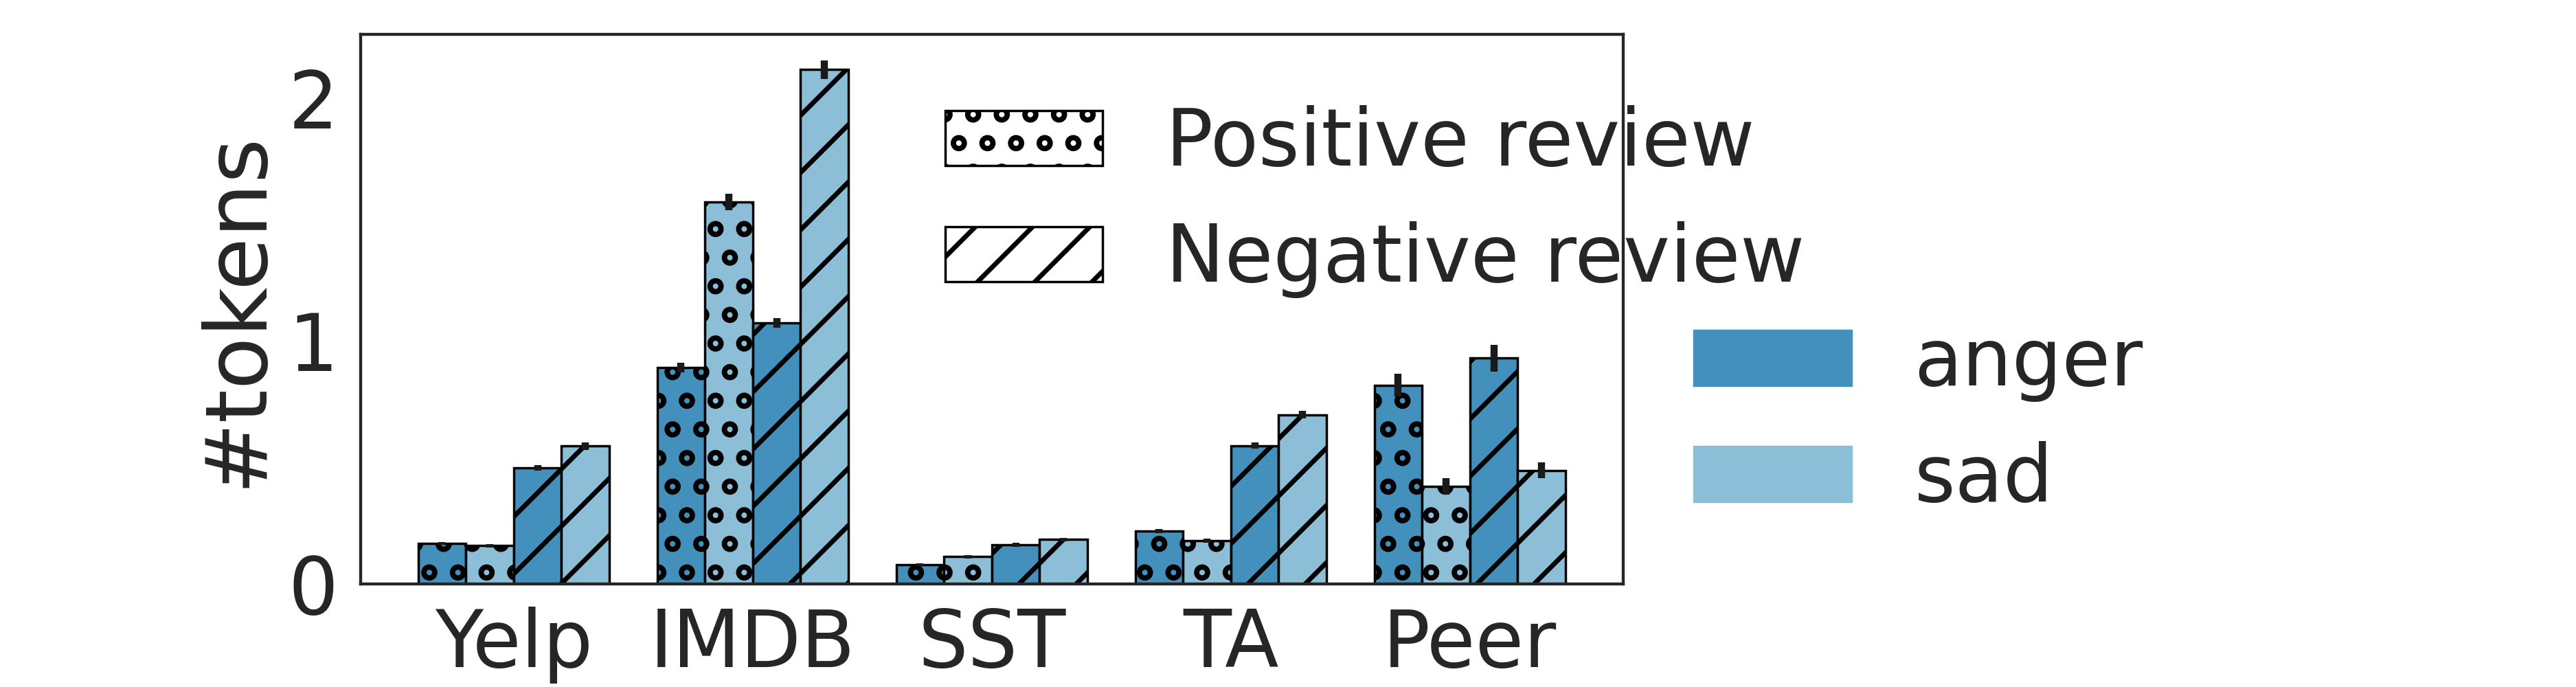




Saving the plot in  ../saves/liwc_dist/liwc_dist_posemo_negemo_word_level_amz


<IPython.core.display.Javascript object>


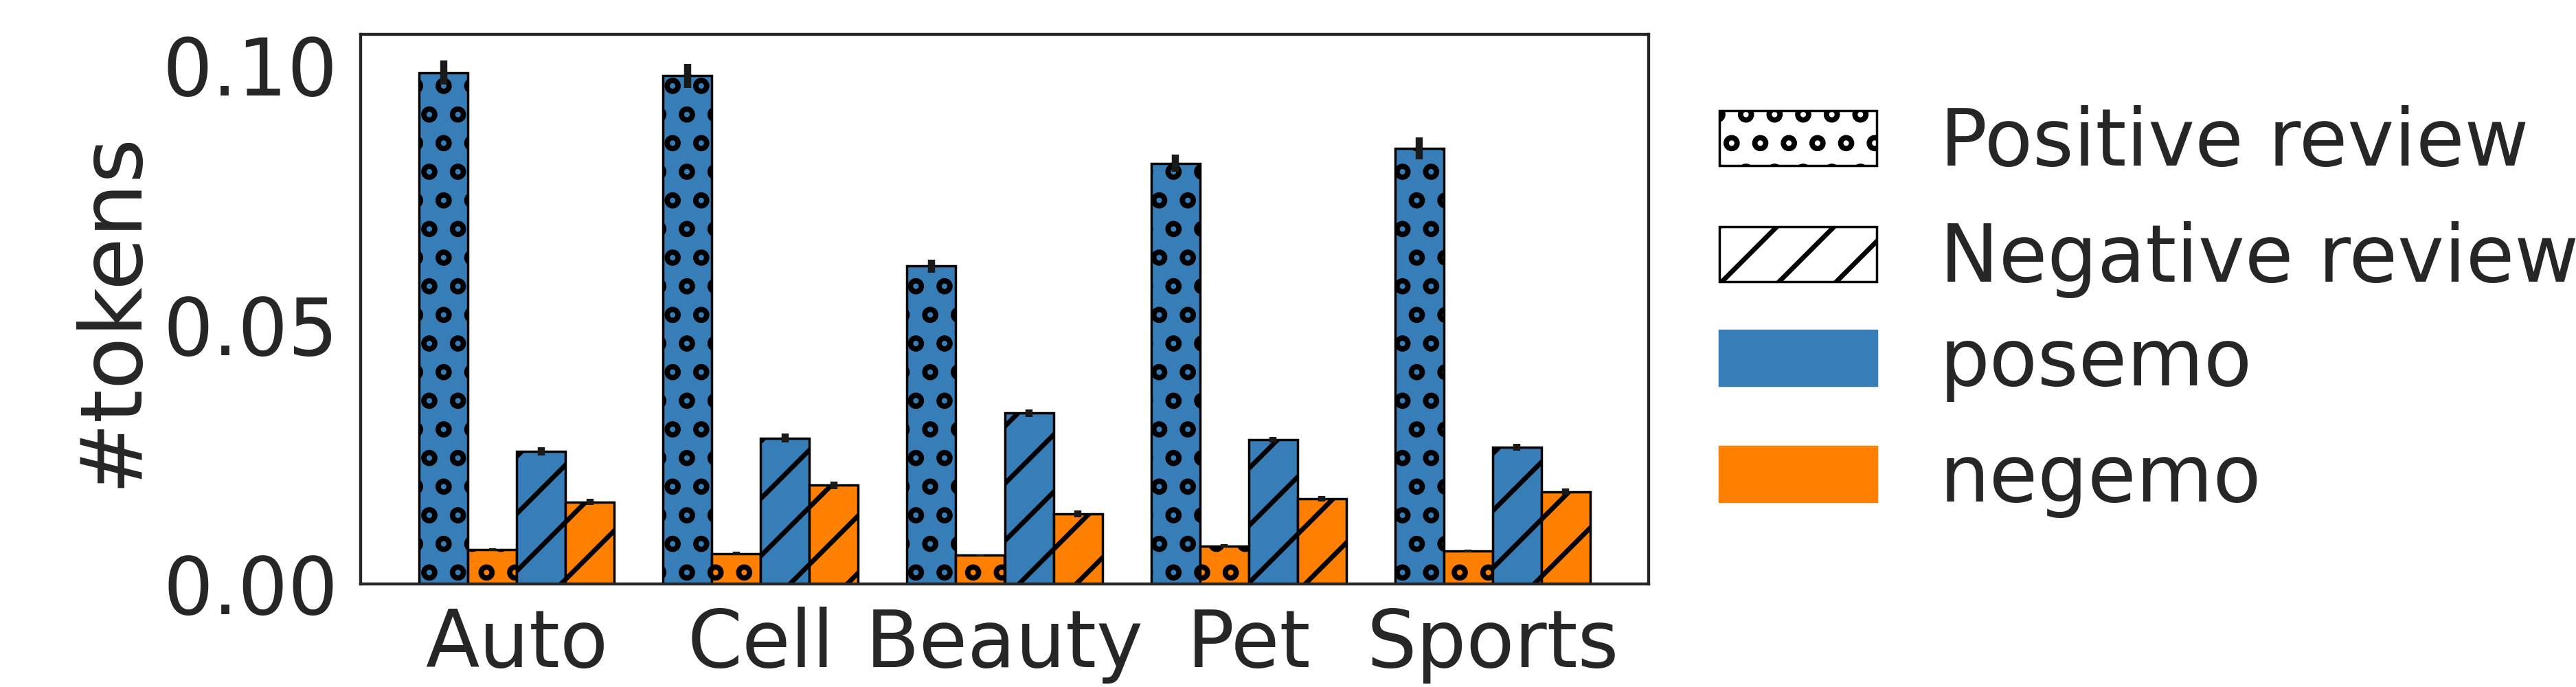




Saving the plot in  ../saves/liwc_dist/liwc_dist_posemo_negemo_word_level_non_amz


<IPython.core.display.Javascript object>


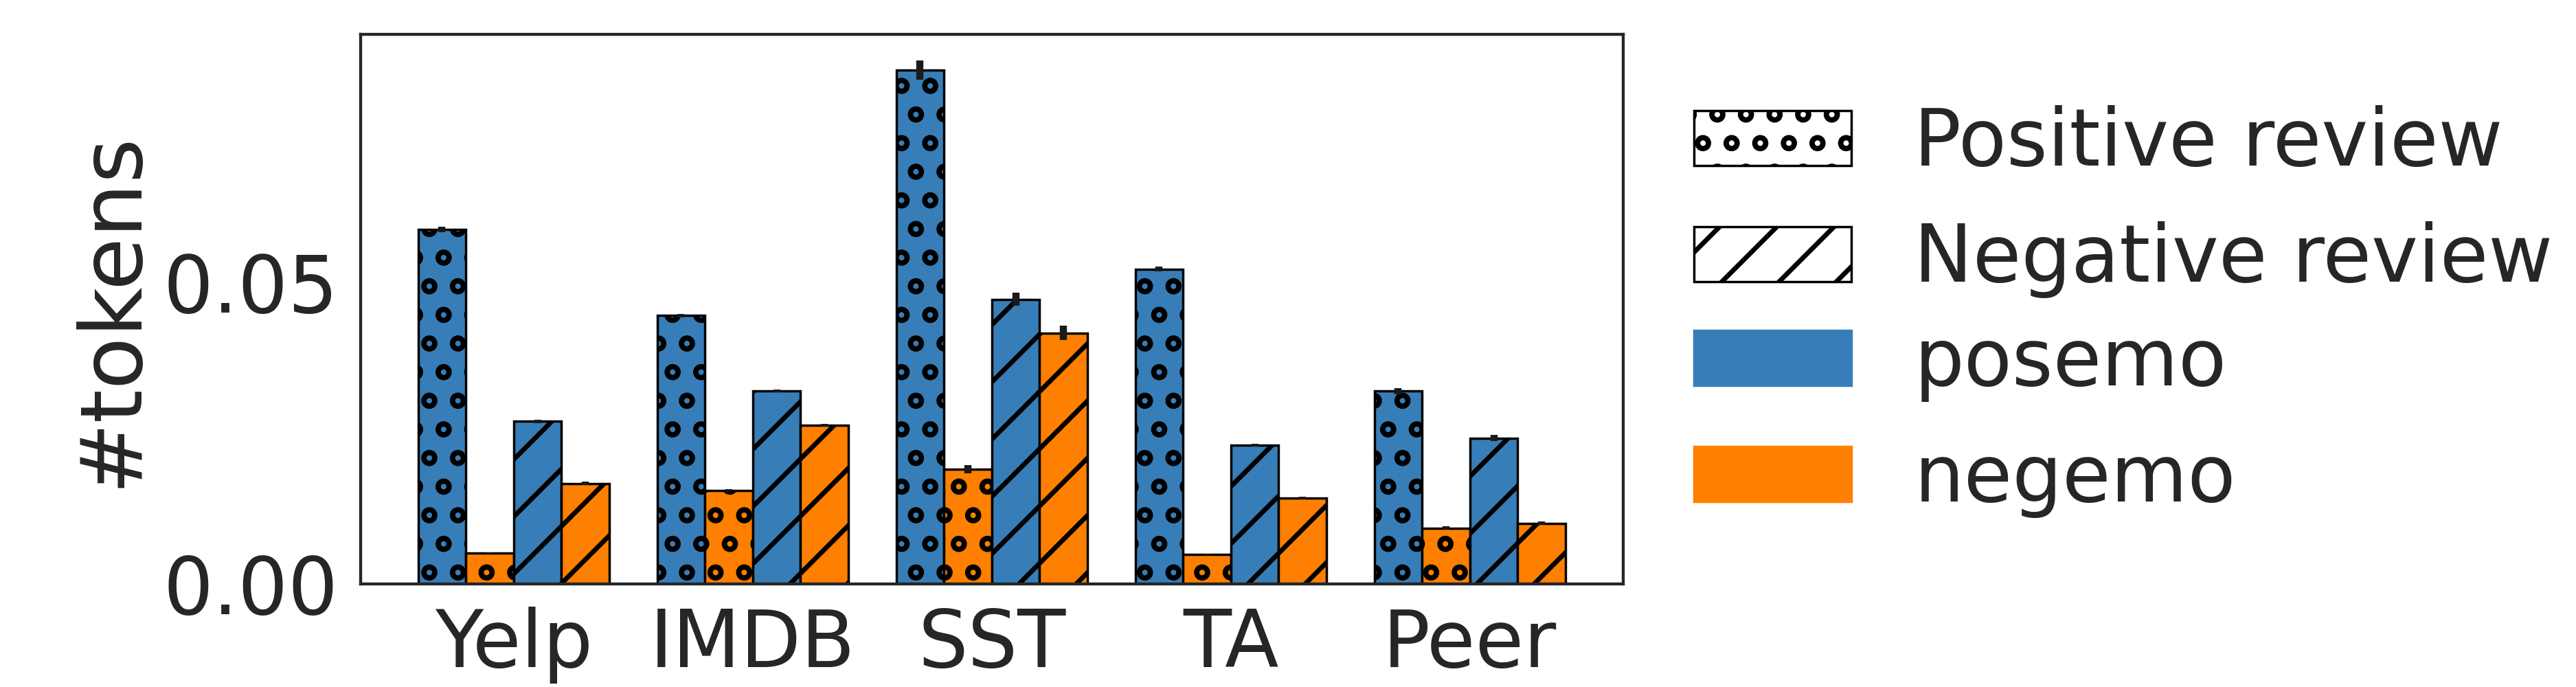




Saving the plot in  ../saves/liwc_dist/liwc_dist_anger_sad_word_level_amz


<IPython.core.display.Javascript object>


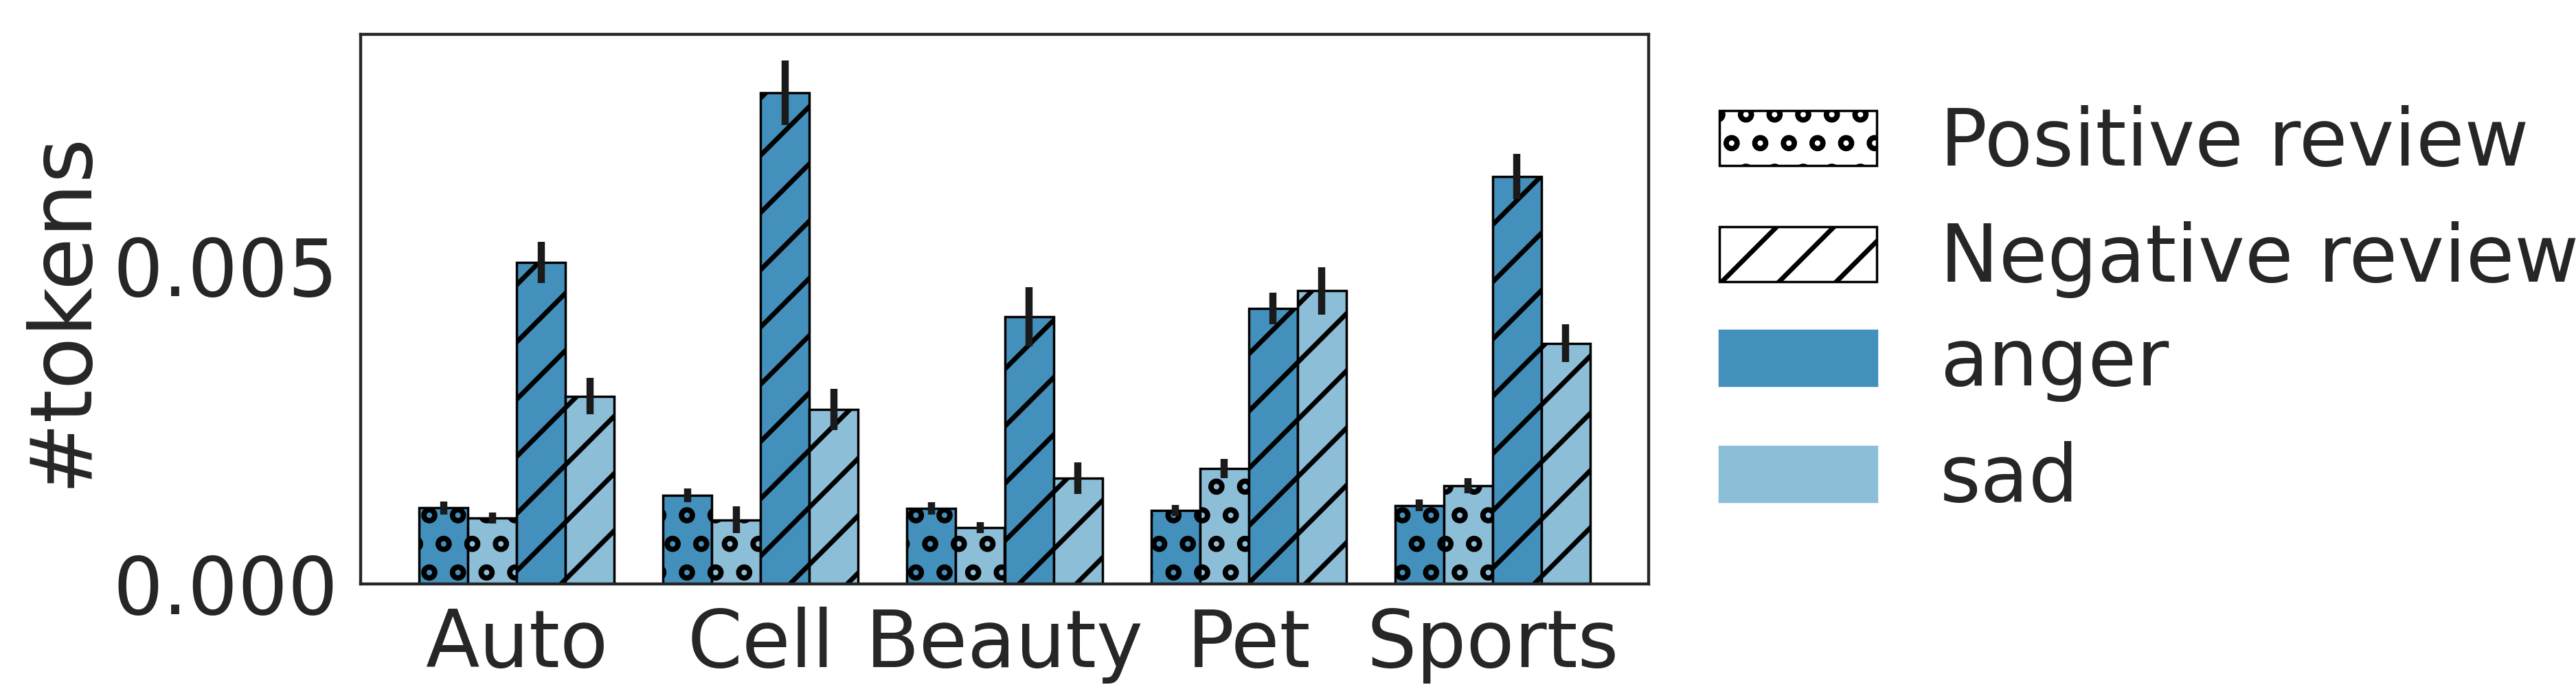




Saving the plot in  ../saves/liwc_dist/liwc_dist_anger_sad_word_level_non_amz


<IPython.core.display.Javascript object>


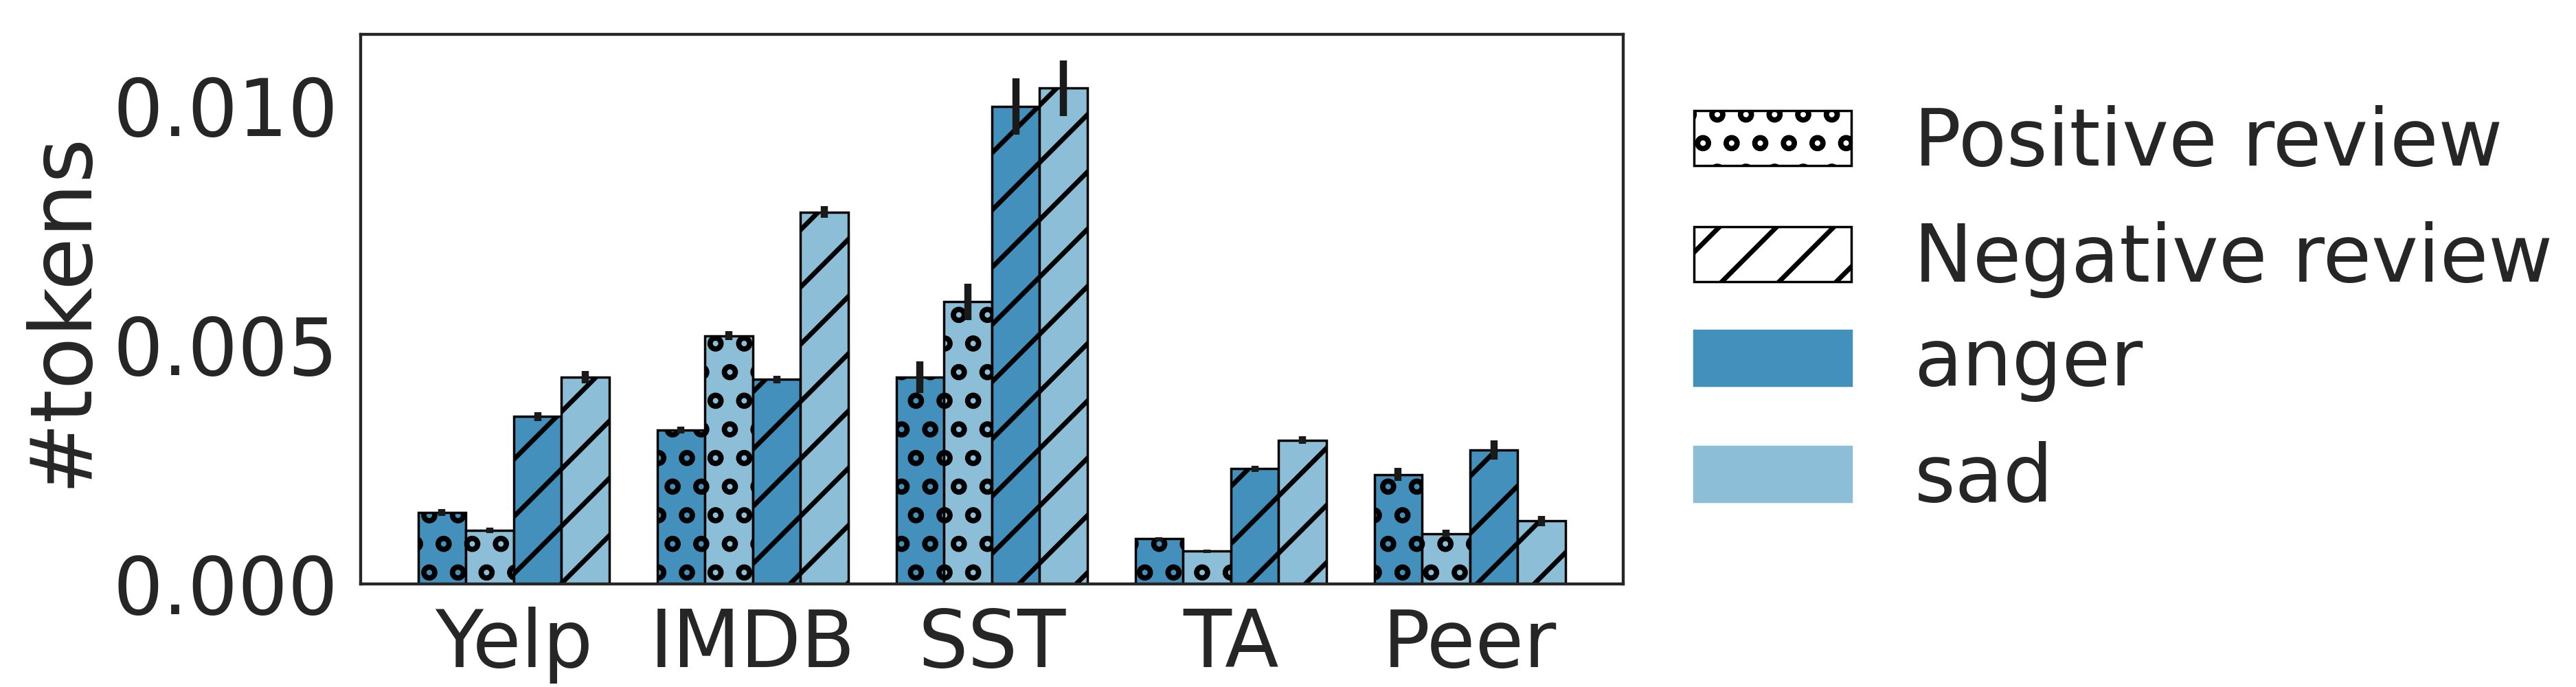

In [5]:
reload(plot_util)
saves_dir = os.path.join("../../saves", "liwc_dist")
Path(saves_dir).mkdir(parents=True, exist_ok=True)
plot_save_prefix = "liwc_dist"
plot_data = {}
analysis_types = [
    "sent_level", 
    "review_level", 
    "word_level"
]

amazon_names = ['Pet Supplies', 'Luxury Beauty', 'Automotive', 'Cellphones', 'Sports']
reload(plot_util)
plot_categories = [
    ["posemo","negemo"], 
    ["anger", "sad"]
]
pickle_save_dir = os.path.join(saves_dir, "all")
Path(pickle_save_dir).mkdir(parents=True, exist_ok=True)
plot_data = pickle.load(open(os.path.join(pickle_save_dir, "liwc_dist_data.pickle"), "rb"))  

for analysis in analysis_types:
    plot_data_df = pd.DataFrame(plot_data[analysis])
    plot_data_pos_neg_amz = []
    plot_data_pos_neg_non_amz = []
    colors = [
        [('#377eb8'), ('#ff7f00')]*2,
        [(67/255, 144/255, 188/255),(141/255, 190/255, 216/255)]*2,
    ]  
    for idx,plot_category in enumerate(plot_categories):
        category_key = "".join(plot_category)
        
        plot_data_cat = plot_data_df[plot_data_df["liwc_category"].isin(plot_category)]
        plot_data_cat = plot_data_cat.to_dict('records')            
        plot_data_cat_amz, plot_data_cat_non_amz = plot_util.filter_plot_data(plot_data_cat)

        plot_util.draw_grouped_bargraph_four_subbars(plot_data_cat_amz, "name", "value", 
            "review category", 
            "liwc_category", 
            plot_savepath = os.path.join(saves_dir, plot_save_prefix+"_"+"_".join(plot_cat)+"_"+str(analysis)+"_amz"),
            figsize=(15, 4), 
            position=(0.14, 0.15, 0.5, 0.8),
            bbox_to_anchor=(1, 0.5, 0.2, 0.5),
            liwc_cats=plot_cat,
            amazon_data_flag=True,
            colors = colors[idx], 
            sentiment_category_key = 'liwc_category')
        
        plot_util.draw_grouped_bargraph_four_subbars(plot_data_cat_non_amz, "name", "value", 
            "review category", 
            "liwc_category",
            plot_savepath = os.path.join(saves_dir, plot_save_prefix+"_"+"_".join(plot_cat)+"_"+str(analysis)+"_non_amz"),
            figsize=(15, 4), 
            position=(0.14, 0.15, 0.49, 0.8),
            bbox_to_anchor=(1, 0.5, 0.2, 0.5),
            liwc_cats=plot_cat,
            amazon_data_flag=False,
            colors = colors[idx], 
            sentiment_category_key = 'liwc_category')
        